# Import Libraries

In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
# Import dataframe
path = r'/Users/hollyringsak/01-2024 Instacart Basket Analysis'

In [10]:
cust_ords_exclusion = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_exclusion.pkl'))

# Step 5 

In [11]:
cust_ords_exclusion.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'date_joined', 'number_of_dependents', 'fam_status', 'income',
       'Unnamed: 0', 'Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0_y', 'order_id',
       'number_of_orders', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'add_to_cart_order', 'reordered', '_merge',
       'merge_2', 'price_range_loc', 'busiest_day', 'days_of_week_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'max_prices', 'spending_flag', 'mean_prices',
       'median_days_since_last_order', 'frequency_flag', 'Region',
       'exclusion_flag'],
      dtype='object')

In [12]:
# Creating a subset
profile_columns = ['Gender', 'State', 'Age', 'number_of_dependents', 'fam_status', 'income', 'product_id', 'product_name', 'department_id', 'prices', 'order_id', 'number_of_orders', 'orders_day_of_week', 'order_hour_of_day', 'price_range_loc', 'max_order', 'loyalty_flag', 'Region', 'mean_prices', 'spending_flag', 'frequency_flag', 'days_since_last_order', 'reordered', 'median_days_since_last_order' ]

In [13]:
customer_profile_sample = cust_ords_exclusion[profile_columns]

In [14]:
# Checking results
customer_profile_sample.head()

,Gender,State,Age,number_of_dependents,fam_status,income,product_id,product_name,department_id,prices,...,price_range_loc,max_order,loyalty_flag,Region,mean_prices,spending_flag,frequency_flag,days_since_last_order,reordered,median_days_since_last_order
0,Female,Connecticut,80,1,married,166726,28,Wheat Chex Cereal,14,10.1,...,Mid-range product,3,New customer,Northeast,7.339130,Low spender,Frequent customer,NaN,0,8.0
1,Male,New York,58,2,married,98633,10,Sparkling Orange Juice & Prickly Pear Beverage,7,8.4,...,Mid-range product,4,New customer,Northeast,8.123077,Low spender,Non-frequent customer,26.0,0,26.0
2,Female,New Hampshire,56,2,married,47966,25,Salted Caramel Lean Protein & Fiber Bar,19,1.9,...,Low-range product,93,Loyal customer,Northeast,6.408088,Low spender,Frequent customer,6.0,0,4.0
3,Female,New Hampshire,56,2,married,47966,25,Salted Caramel Lean Protein & Fiber Bar,19,1.9,...,Low-range product,93,Loyal customer,Northeast,6.408088,Low spender,Frequent customer,5.0,1,4.0
4,Female,New Hampshire,56,2,married,47966,25,Salted Caramel Lean Protein & Fiber Bar,19,1.9,...,Low-range product,93,Loyal customer,Northeast,6.408088,Low spender,Frequent customer,5.0,1,4.0


In [15]:
customer_profile_sample.shape

(31640379, 24)

In [16]:
# Export Sample 
customer_profile_sample.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profile_sample.pkl'))

In [17]:
# Create random seed
np.random.seed(4)
dev = np.random.rand(len(customer_profile_sample)) <= 0.7

In [18]:
# Store 70% of sample into dataframe big
big = customer_profile_sample[dev]

In [19]:
# Store 30% of sample into dataframe small
small = customer_profile_sample[~dev]

In [20]:
# Checking results
small.shape

(9491887, 24)

In [21]:
small.head()

,Gender,State,Age,number_of_dependents,fam_status,income,product_id,product_name,department_id,prices,...,price_range_loc,max_order,loyalty_flag,Region,mean_prices,spending_flag,frequency_flag,days_since_last_order,reordered,median_days_since_last_order
0,Female,Connecticut,80,1,married,166726,28,Wheat Chex Cereal,14,10.1,...,Mid-range product,3,New customer,Northeast,7.339130,Low spender,Frequent customer,NaN,0,8.0
2,Female,New Hampshire,56,2,married,47966,25,Salted Caramel Lean Protein & Fiber Bar,19,1.9,...,Low-range product,93,Loyal customer,Northeast,6.408088,Low spender,Frequent customer,6.0,0,4.0
3,Female,New Hampshire,56,2,married,47966,25,Salted Caramel Lean Protein & Fiber Bar,19,1.9,...,Low-range product,93,Loyal customer,Northeast,6.408088,Low spender,Frequent customer,5.0,1,4.0
6,Female,New Hampshire,56,2,married,47966,25,Salted Caramel Lean Protein & Fiber Bar,19,1.9,...,Low-range product,93,Loyal customer,Northeast,6.408088,Low spender,Frequent customer,3.0,1,4.0
10,Female,Wyoming,43,2,married,142413,23,Organic Turkey Burgers,12,8.2,...,Mid-range product,52,Loyal customer,West,7.912150,Low spender,Frequent customer,11.0,0,7.0


In [22]:
# Exporting sample
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'random_sample_profile.pkl'))

In [23]:
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [24]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [25]:
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [26]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [27]:
small_merge = small.merge(df_dept, on = 'department_id')

In [28]:
small_merge.head()

,Gender,State,Age,number_of_dependents,fam_status,income,product_id,product_name,department_id,prices,...,max_order,loyalty_flag,Region,mean_prices,spending_flag,frequency_flag,days_since_last_order,reordered,median_days_since_last_order,department
0,Female,Connecticut,80,1,married,166726,28,Wheat Chex Cereal,14,10.1,...,3,New customer,Northeast,7.339130,Low spender,Frequent customer,NaN,0,8.0,breakfast
1,Female,Arkansas,19,0,single,66582,28,Wheat Chex Cereal,14,10.1,...,6,New customer,South,7.603306,Low spender,Regular customer,6.0,0,12.0,breakfast
2,Female,Arkansas,19,0,single,66582,28,Wheat Chex Cereal,14,10.1,...,6,New customer,South,7.603306,Low spender,Regular customer,7.0,1,12.0,breakfast
3,Male,Iowa,68,0,divorced/widowed,135470,28,Wheat Chex Cereal,14,10.1,...,99,Loyal customer,Midwest,7.258438,Low spender,Frequent customer,4.0,0,3.0,breakfast
4,Male,Nebraska,58,3,married,119144,28,Wheat Chex Cereal,14,10.1,...,8,New customer,Midwest,9.718605,Low spender,Non-frequent customer,26.0,0,30.0,breakfast


# Step 6

In [29]:
# Checking minimum and maximum age
small_merge['Age'].min()

18

In [30]:
small_merge['Age'].max()

81

In [31]:
# Define age groups

In [32]:
# Group 1 = Ages 18-30
small_merge.loc[(small_merge['Age'] >= 18) & (small_merge['Age'] <= 30), 'age_group'] = 'Young adult'

In [33]:
# Group 2 = Ages 31-45
small_merge.loc[(small_merge['Age'] >= 31) & (small['Age'] <= 45), 'age_group'] = 'Adult'

In [34]:
# Group 3 = Ages 46-60
small_merge.loc[(small_merge['Age'] >= 46) & (small_merge['Age'] <= 60), 'age_group'] = 'Middle-Aged Adult'

In [35]:
# Group 4 = Ages 61-70
small_merge.loc[(small_merge['Age'] >= 61) & (small_merge['Age'] <= 70), 'age_group'] = 'Older Adult'

In [36]:
# Group 5 = Ages 71-81
small_merge.loc[(small_merge['Age'] >= 71) & (small_merge['Age'] <= 81), 'age_group'] = 'Senior'

In [37]:
# Check output
small_merge['age_group'].value_counts(dropna = True)

age_group
Middle-Aged Adult    2232944
nan                  1941017
Young adult          1934171
Senior               1633129
Older Adult          1466113
Adult                 284513
Name: count, dtype: int64

# Creating income groups

In [38]:
# Checking maximun and minimum
small_merge['income'].min()

25903

In [39]:
small_merge['income'].max()

593901

In [40]:
small_merge['income'].mean()

99508.68805296565

In [41]:
# Create groups based off income

In [42]:
# Low Income = Income less than 50,000
small_merge.loc[small_merge['income'] < 50000,'income_group'] = 'Low Income'

In [43]:
# Mid Income = Income equal to or greater than 50,000 & less than 100,000
small_merge.loc[(small_merge['income'] >= 50000) & (small_merge['income'] < 100000),'income_group'] = 'Mid Income'

In [44]:
# High Income = Income greater than or equal to 100,000
small_merge.loc[small_merge['income'] >= 100000, 'income_group'] = 'High Income'

In [45]:
# Check output
small_merge['income_group'].value_counts(dropna = False)

income_group
High Income    4344702
Mid Income     4102235
Low Income     1044950
Name: count, dtype: int64

# Creating groups based off dependants

In [46]:
# Checking maximum and minimum amount of dependants
small_merge['number_of_dependents'].min()

0

In [47]:
small_merge['number_of_dependents'].max()

3

In [48]:
# Creating groups to determine if someone does or does not have dependants

In [49]:
small_merge.loc[small_merge['number_of_dependents'] == 0,'dependants_group'] = 'No Dependants'

In [50]:
small_merge.loc[small_merge['number_of_dependents'] >= 1,'dependants_group'] = 'Has Dependants'

In [51]:
small_merge['dependants_group'].value_counts(dropna = False)

dependants_group
Has Dependants    7120913
No Dependants     2370974
Name: count, dtype: int64

In [52]:
# Checking fam status
small_merge['fam_status'].value_counts(dropna = False)

fam_status
married                             6666620
single                              1559109
divorced/widowed                     811865
living with parents and siblings     454293
Name: count, dtype: int64

# Creating Customer Profile

In [53]:
# Creating customer profile 1 based off income and age group

#Group 1 = Low Income Young Adult

small_merge.loc[(small_merge['age_group']== 'Young Adult') & (small_merge['income_group']=='Low Income'), 'age_income_profile'] = 'Low Income Young Adult'

# Group 2 = Low Income Adult

small_merge.loc[(small_merge['age_group']== 'Adult') & (small_merge['income_group']=='Low Income'), 'age_income_profile'] = 'Low Income Adult'

# Group 3 = Low Income Middle-Aged Adult

small_merge.loc[(small_merge['age_group']== 'Middle-Aged Adult') & (small_merge['income_group']=='Low Income'), 'age_income_profile'] = 'Low Income Middle-Aged Adult'

# Group 4 = Low Income Older Adult

small_merge.loc[(small_merge['age_group']== 'Older Adult') & (small_merge['income_group']=='Low Income'), 'age_income_profile'] = 'Low Income Older Adult'

# Group 5 = Low Income Senior

small_merge.loc[(small_merge['age_group']== 'Senior') & (small_merge['income_group']=='Low Income'), 'age_income_profile'] = 'Low Income Senior'

# Group 6 = Mid Income Young Adult

small_merge.loc[(small_merge['age_group']== 'Young Adult') & (small_merge['income_group']=='Mid Income'), 'age_income_profile'] = 'Mid Income Young Adult'

# Group 7 = Mid Income Adult

small_merge.loc[(small_merge['age_group']== 'Adult') & (small_merge['income_group']=='Mid Income'), 'age_income_profile'] = 'Mid Income Adult'

# Group 8 = Mid Income Middle-Aged Adult

small_merge.loc[(small_merge['age_group']== 'Middle-Aged Adult') & (small_merge['income_group']=='Mid Income'), 'age_income_profile'] = 'Mid Income Middle-Aged Adult'

# Group 9 = Mid Income Older Adult

small_merge.loc[(small_merge['age_group']== 'Older Adult') & (small_merge['income_group']=='Mid Income'), 'age_income_profile'] = 'Mid Income Older Adult'

# Group 10 = Mid Income Senior

small_merge.loc[(small_merge['age_group']== 'Senior') & (small_merge['income_group']=='Mid Income'), 'age_income_profile'] = 'Mid Income Senior'

# Group 11 = High Income Young Adult

small_merge.loc[(small_merge['age_group']== 'Young Adult') & (small_merge['income_group']=='High Income'), 'age_income_profile'] = 'High Income Young Adult'

# Group 12 = High Income Adult

small_merge.loc[(small_merge['age_group']== 'Adult') & (small_merge['income_group']=='High Income'), 'age_income_profile'] = 'High Income Adult'

# Group 13 = High Income Middle-Aged Adult

small_merge.loc[(small_merge['age_group']== 'Middle-Aged Adult') & (small_merge['income_group']=='High Income'), 'age_income_profile'] = 'High Income Middle-Aged Adult'

# Group 14 = High Income Older Adult

small_merge.loc[(small_merge['age_group']== 'Older Adult') & (small_merge['income_group']=='High Income'), 'age_income_profile'] = 'High Income Older Adult'

# Group 15 = High Income Senior

small_merge.loc[(small_merge['age_group']== 'Senior') & (small_merge['income_group']=='High Income'), 'age_income_profile'] = 'High Income Senior'

# Check Results

filtered_small = small_merge[small_merge['age_income_profile'] != 'nan']

filtered_small['age_income_profile'].value_counts(dropna = False)


age_income_profile
High Income Middle-Aged Adult    1552189
High Income Senior               1141197
High Income Older Adult          1023135
Mid Income Middle-Aged Adult      489344
Mid Income Senior                 355475
Mid Income Older Adult            319402
Low Income Middle-Aged Adult      191411
Mid Income Adult                  174623
Low Income Senior                 136457
Low Income Older Adult            123576
High Income Adult                  72891
Low Income Adult                   36999
Name: count, dtype: int64

In [54]:
# Creating customer profile 2 based on family status and dependants

# Group 1 = Married No Dependants

small_merge.loc[(small_merge['fam_status']== 'married') & (small_merge['dependants_group']=='No Dependants'), 'fam_dependants_profile'] = 'Married No Dependants'

# Group 2 = Married w/ Dependants

small_merge.loc[(small_merge['fam_status']== 'married') & (small_merge['dependants_group']=='Has Dependants'), 'fam_dependants_profile'] = 'Married w/ Dependants'

# Group 3 = Single No Dependants

small_merge.loc[(small_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (small_merge['dependants_group']=='No Dependants'), 'fam_dependants_profile'] = 'Single No Dependants'

# Group 4 = Single w/ Dependants

small_merge.loc[(small_merge['fam_status'].isin(['single', 'divorced/widowed'])) & (small_merge['dependants_group']=='Has Dependants'), 'fam_dependants_profile'] = 'Single w/ Dependants'

# Check results
filtered_small = small_merge[small_merge['fam_dependants_profile'] != 'nan']

filtered_small['fam_dependants_profile'].value_counts(dropna = True)

fam_dependants_profile
Married w/ Dependants    6666620
Single No Dependants     2370974
Name: count, dtype: int64

In [55]:
 # Creating customer profile based on age and family status
    
# Group 1 = Single Young Adult

small_merge.loc[(small_merge['age_group']== 'Young Adult') & (small_merge['fam_status'].isin(['single', 'divorced/widowed'])), 'fam_age_profile'] = 'Single Young Adult'

# Group 2 = Single Adult

small_merge.loc[(small_merge['age_group']== 'Adult') & (small_merge['fam_status'].isin(['single', 'divorced/widowed'])), 'fam_age_profile'] = 'Single Adult'

# Group 3 = Single Middle-Aged Adult

small_merge.loc[(small_merge['age_group']== 'Middle-Aged Adult') & (small_merge['fam_status'].isin(['single', 'divorced/widowed'])), 'fam_age_profile'] = 'Single Middle-Aged Adult'

# Group 4 = Single Older Adult

small_merge.loc[(small_merge['age_group']== 'Older Adult') & (small_merge['fam_status'].isin(['single', 'divorced/widowed'])), 'fam_age_profile'] = 'Single Older Adult'

# Group 5 = Single Senior

small_merge.loc[(small_merge['age_group']== 'Senior') & (small_merge['fam_status'].isin(['single', 'divorced/widowed'])), 'fam_age_profile'] = 'Single Senior'

# Group 6 = Married Young Adult

small_merge.loc[(small_merge['age_group']== 'Young Adult') & (small_merge['fam_status']== 'married'), 'fam_age_profile'] = 'Married Young Adult'

# Group 7 = Married Adult

small_merge.loc[(small_merge['age_group']== 'Adult') & (small_merge['fam_status']== 'married'), 'fam_age_profile'] = 'Married Adult'

# Group 8 = Married Middle-Aged Adult

small_merge.loc[(small_merge['age_group']== 'Middle-Aged Adult') & (small_merge['fam_status']== 'married'), 'fam_age_profile'] = 'Married Middle-Aged Adult'

# Group 9 = Married Older Adult

small_merge.loc[(small_merge['age_group']== 'Older Adult') & (small_merge['fam_status']== 'married'), 'fam_age_profile'] = 'Married Older Adult'

# Group 10 = Married Senior

small_merge.loc[(small_merge['age_group']== 'Senior') & (small_merge['fam_status']== 'married'), 'fam_age_profile'] = 'Married Senior'

# Check Results
filtered_small = small_merge[small_merge['fam_age_profile'] != 'nan']

filtered_small['fam_age_profile'].value_counts(dropna = True)

fam_age_profile
Married Middle-Aged Adult    1675260
Married Senior               1227242
Married Older Adult          1094610
Single Middle-Aged Adult      557684
Single Senior                 405887
Single Older Adult            371503
Married Adult                 213711
Single Adult                   70802
Name: count, dtype: int64

# Profile Distribution Visualization

In [56]:
# Creating a bar chart to show distribution of age_income_profile
filtered_small['age_income_profile'].value_counts().sort_index()

age_income_profile
High Income Adult                  72891
High Income Middle-Aged Adult    1552189
High Income Older Adult          1023135
High Income Senior               1141197
Low Income Adult                   36999
Low Income Middle-Aged Adult      191411
Low Income Older Adult            123576
Low Income Senior                 136457
Mid Income Adult                  174623
Mid Income Middle-Aged Adult      489344
Mid Income Older Adult            319402
Mid Income Senior                 355475
Name: count, dtype: int64

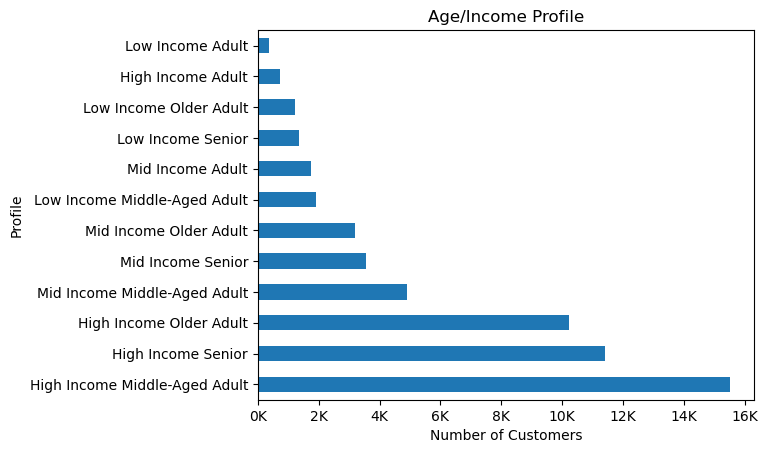

In [57]:
age_income_bar = filtered_small['age_income_profile'].value_counts().plot.barh(title = 'Age/Income Profile', xlabel = 'Number of Customers', ylabel = 'Profile')

age_income_bar.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: format(y/100000,'1.00f')+'K'))

In [58]:
# Export chart
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_profile.png'))

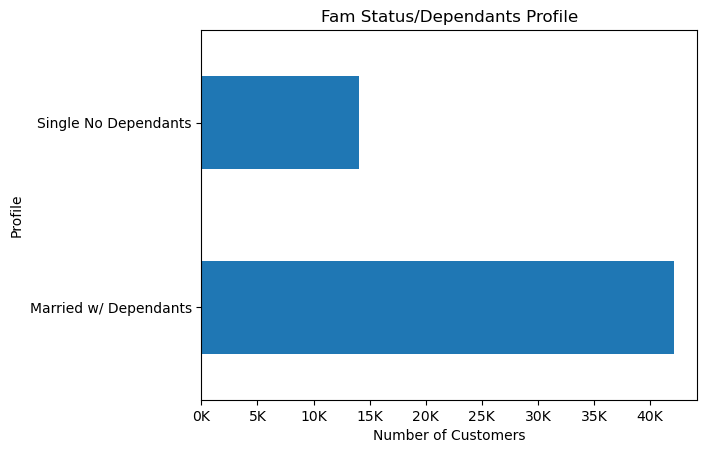

In [59]:
# Creating a bar chart to show the distribution of the fam_dependants_profile
fam_dependants_profile = filtered_small['fam_dependants_profile'].value_counts().plot.barh(title = 'Fam Status/Dependants Profile', xlabel = 'Number of Customers', ylabel = 'Profile')

fam_dependants_profile.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: format(y/100000,'1.00f')+'K'))

In [60]:
fam_dependants_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_dependants_profile.png'))

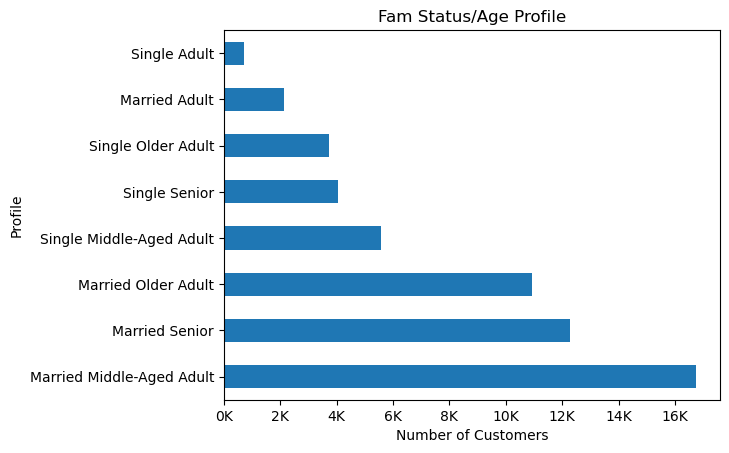

In [61]:
fam_age_bar = filtered_small['fam_age_profile'].value_counts().plot.barh(title = 'Fam Status/Age Profile', xlabel = 'Number of Customers', ylabel = 'Profile')

fam_age_bar.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: format(y/100000,'1.00f')+'K'))

In [62]:
fam_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_age_profile.png'))

# Aggregating Customer Profiles 

In [63]:
# Aggregating mean, min, and max for age income profile and number of orders

filtered_small.groupby('age_income_profile').agg({'number_of_orders': ['mean', 'min', 'max']})

number_of_orders        
                                          mean min max
age_income_profile                                    
High Income Adult                    17.673732   1  99
High Income Middle-Aged Adult        17.515192   1  99
High Income Older Adult              17.788563   1  99
High Income Senior                   17.544976   1  99
Low Income Adult                     16.289954   1  99
Low Income Middle-Aged Adult         16.787248   1  99
Low Income Older Adult               16.217210   1  99
Low Income Senior                    16.482511   1  99
Mid Income Adult                     17.776908   1  99
Mid Income Middle-Aged Adult         17.815404   1  99
Mid Income Older Adult               16.996456   1  99
Mid Income Senior                    17.594855   1  99

In [64]:
# Aggregating mean, min, and max for age income profile and price

filtered_small.groupby('age_income_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                                    mean  min      max
age_income_profile                                    
High Income Adult              24.331543  1.0  99999.0
High Income Middle-Aged Adult  13.862041  1.0  99999.0
High Income Older Adult        13.521260  1.0  99999.0
High Income Senior             13.131265  1.0  99999.0
Low Income Adult                6.846439  1.0     25.0
Low Income Middle-Aged Adult    6.494197  1.0     25.0
Low Income Older Adult          6.521283  1.0     25.0
Low Income Senior               6.542942  1.0     25.0
Mid Income Adult                8.594765  1.0  99999.0
Mid Income Middle-Aged Adult    8.801072  1.0  99999.0
Mid Income Older Adult          8.661872  1.0  99999.0
Mid Income Senior               8.374173  1.0  99999.0

In [65]:
# Aggregating mean, min, and max for age income profile and days since last order

filtered_small.groupby('age_income_profile').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                                               mean  min   max
age_income_profile                                            
High Income Adult                         10.844387  0.0  30.0
High Income Middle-Aged Adult             10.943075  0.0  30.0
High Income Older Adult                   10.800244  0.0  30.0
High Income Senior                        10.883543  0.0  30.0
Low Income Adult                          11.505609  0.0  30.0
Low Income Middle-Aged Adult              11.224177  0.0  30.0
Low Income Older Adult                    11.473512  0.0  30.0
Low Income Senior                         11.234862  0.0  30.0
Mid Income Adult                          10.846919  0.0  30.0
Mid Income Middle-Aged Adult              10.875598  0.0  30.0
Mid Income Older Adult                    11.104567  0.0  30.0
Mid Income Senior                         10.919128  0.0  30.0

In [66]:
# Aggregating mean, min, and max for fam dependants profile and number of orders

filtered_small.groupby('fam_dependants_profile').agg({'number_of_orders': ['mean', 'min', 'max']})

number_of_orders        
                                   mean min max
fam_dependants_profile                         
Married w/ Dependants         17.409907   1  99
Single No Dependants          17.755493   1  99

In [67]:
# Aggregating mean, min, and max for fam dependants profile and price

filtered_small.groupby('fam_dependants_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                             mean  min      max
fam_dependants_profile                         
Married w/ Dependants   11.796748  1.0  99999.0
Single No Dependants    12.221258  1.0  99999.0

In [68]:
# Aggregating mean, min, and max for fam dependants profile and days since last order

filtered_small.groupby('fam_dependants_profile').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                                        mean  min   max
fam_dependants_profile                                 
Married w/ Dependants              10.958048  0.0  30.0
Single No Dependants               10.862722  0.0  30.0

In [69]:
# Aggregating mean, min, and max for fam age profile and number of orders

filtered_small.groupby('fam_age_profile').agg({'number_of_orders': ['mean', 'min', 'max']})

number_of_orders        
                                      mean min max
fam_age_profile                                   
Married Adult                    17.556967   1  99
Married Middle-Aged Adult        17.377781   1  99
Married Older Adult              17.370053   1  99
Married Senior                   17.463700   1  99
Single Adult                     17.557527   1  99
Single Middle-Aged Adult         17.941546   1  99
Single Older Adult               17.817964   1  99
Single Senior                    17.477212   1  99

In [70]:
# Aggregating mean, min, and max for fam age profile and price

filtered_small.groupby('fam_age_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                                mean  min      max
fam_age_profile                                   
Married Adult              12.237553  1.0  99999.0
Married Middle-Aged Adult  11.892608  1.0  99999.0
Married Older Adult        12.260222  1.0  99999.0
Married Senior             11.175748  1.0  99999.0
Single Adult               12.886725  1.0  99999.0
Single Middle-Aged Adult   12.808525  1.0  99999.0
Single Older Adult         10.730481  1.0  99999.0
Single Senior              12.662767  1.0  99999.0

In [71]:
# Aggregating mean, min, and max for fam age profile and days since last order

filtered_small.groupby('fam_age_profile').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                                           mean  min   max
fam_age_profile                                           
Married Adult                         10.930682  0.0  30.0
Married Middle-Aged Adult             10.989561  0.0  30.0
Married Older Adult                   10.956965  0.0  30.0
Married Senior                        10.920774  0.0  30.0
Single Adult                          10.932076  0.0  30.0
Single Middle-Aged Adult              10.839960  0.0  30.0
Single Older Adult                    10.821964  0.0  30.0
Single Senior                         10.919228  0.0  30.0

In [72]:
age_frequency = pd.crosstab(filtered_small['frequency_flag'],filtered_small['age_income_profile'],dropna = False)

In [73]:
age_frequency

age_income_profile,High Income Adult,High Income Middle-Aged Adult,High Income Older Adult,High Income Senior,Low Income Adult,Low Income Middle-Aged Adult,Low Income Older Adult,Low Income Senior,Mid Income Adult,Mid Income Middle-Aged Adult,Mid Income Older Adult,Mid Income Senior
frequency_flag,,,,,,,,,,,,
Frequent customer,49906,1047846,702442,774173,23204,124059,78429,89599,119193,330839,212848,242628
Non-frequent customer,7093,155334,101856,111486,4811,24162,16225,17014,17093,51428,35223,36545
Regular customer,15892,349009,218837,255538,8984,43190,28922,29844,38337,107077,71331,76302


# Compare Customer Profiles by Region and Department

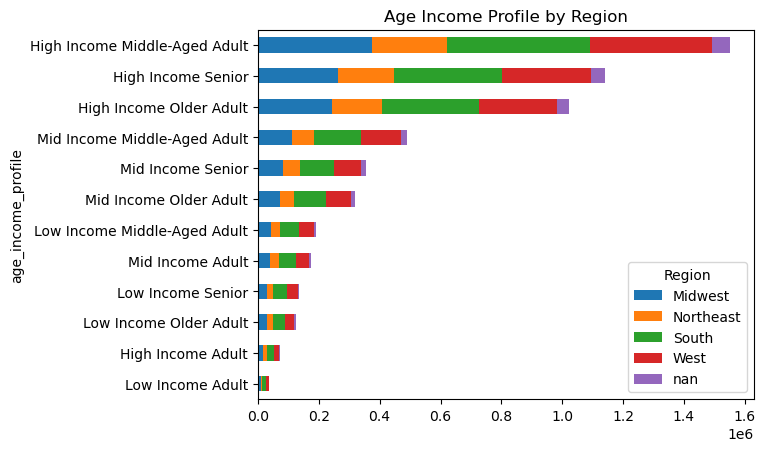

In [74]:
# Group by age_income_profile & region

age_income_region = filtered_small.groupby(['age_income_profile','Region']).size().unstack()

# Sort values, ascending

age_income_region = age_income_region.loc[age_income_region.sum(axis = 1).sort_values(ascending = True).index]

# Create a stacked bar chart

age_income_region = age_income_region.plot.barh(stacked = True, title ='Age Income Profile by Region')


In [75]:
# Export chart
age_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_profile_by_region.png'))

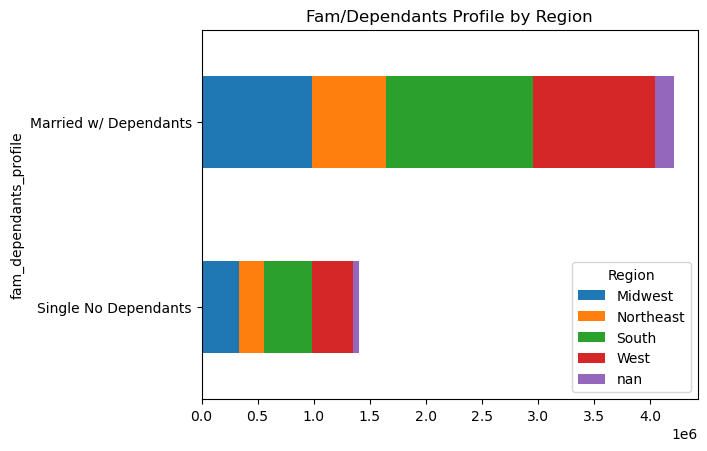

In [76]:
# Group by fam_dependants_profile & region
fam_dependants_region = filtered_small.groupby(['fam_dependants_profile','Region']).size().unstack()
# Sort values, ascending
fam_dependants_region = fam_dependants_region.loc[fam_dependants_region.sum(axis = 1).sort_values(ascending = True).index]
# Create stacked bar chart
fam_dependants_region = fam_dependants_region.plot.barh(stacked = True, title ='Fam/Dependants Profile by Region')

In [77]:
# Export chart
fam_dependants_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_dependants_profile_by_region.png'))

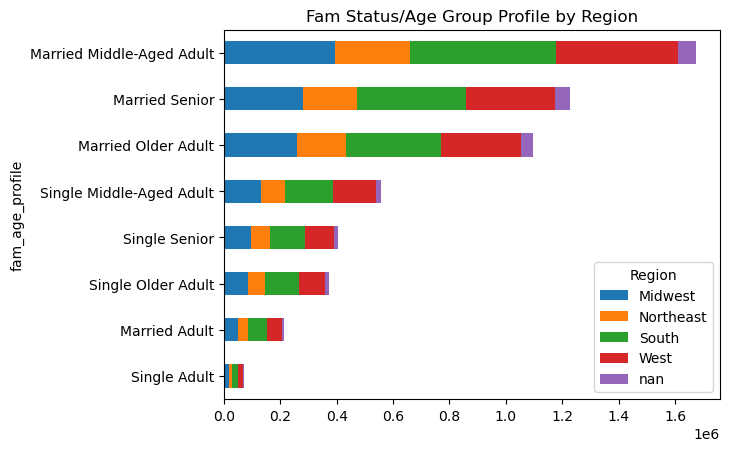

In [78]:
# Group by fam_age_profile and region
fam_age_region = filtered_small.groupby(['fam_age_profile','Region']).size().unstack()
# Sort values, ascending
fam_age_region = fam_age_region.loc[fam_age_region.sum(axis = 1).sort_values(ascending = True).index]
# Create stacked bar chart
fam_age_region = fam_age_region.plot.barh(stacked = True, title ='Fam Status/Age Group Profile by Region')

In [79]:
# Export chart
fam_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_age_profile_by_region.png'))

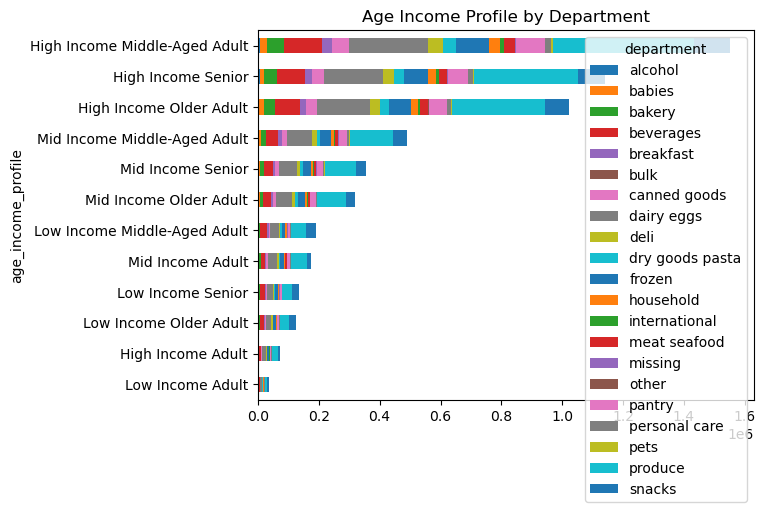

In [80]:
# Group by age_income_profile & department

age_income_department = filtered_small.groupby(['age_income_profile','department']).size().unstack()

# Sort values, ascending

age_income_department = age_income_department.loc[age_income_department.sum(axis = 1).sort_values(ascending = True).index]

# Create a stacked bar chart

age_income_department = age_income_department.plot.barh(stacked = True, title ='Age Income Profile by Department')

In [81]:
# Export chart
age_income_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_profile_by_department.png'))

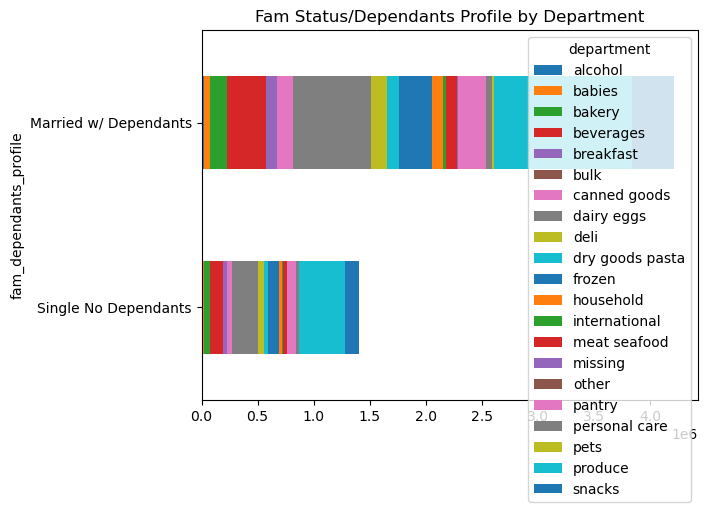

In [82]:
# Group by fam_dependants_profile & department

fam_dependants_department = filtered_small.groupby(['fam_dependants_profile','department']).size().unstack()

# Sort values, ascending

fam_dependants_department = fam_dependants_department.loc[fam_dependants_department.sum(axis = 1).sort_values(ascending = True).index]

# Create a stacked bar chart

fam_dependants_department = fam_dependants_department.plot.barh(stacked = True, title ='Fam Status/Dependants Profile by Department')

In [83]:
fam_dependants_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_dependants_profile_by_department.png'))

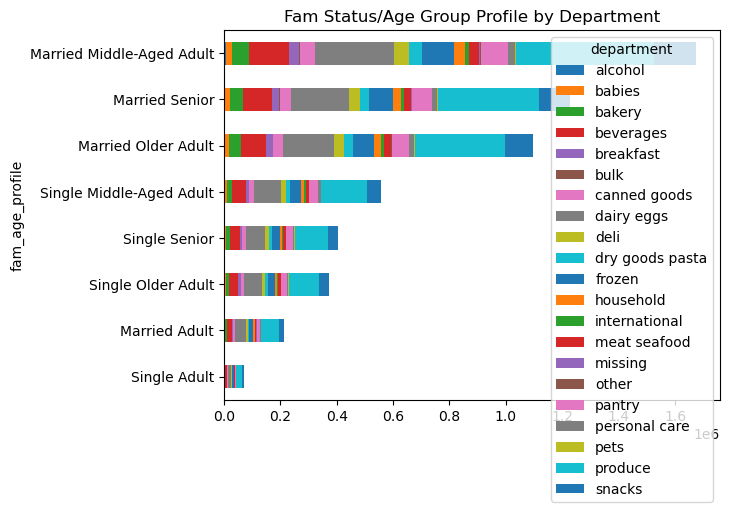

In [84]:
# Group by fam_age_profile & department

fam_age_department = filtered_small.groupby(['fam_age_profile','department']).size().unstack()

# Sort values, ascending

fam_age_department = fam_age_department.loc[fam_age_department.sum(axis = 1).sort_values(ascending = True).index]

# Create a stacked bar chart

fam_age_department = fam_age_department.plot.barh(stacked = True, title ='Fam Status/Age Group Profile by Department')

In [85]:
# Export chart
fam_age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_age_profile_by_department.png'))

In [86]:
# Exporting dataframe
filtered_small.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_dataset.pkl'))